# Reducing hospital readmissions

## 📖 Background
You work for a consulting company helping a hospital group better understand patient readmissions. The hospital gave you access to ten years of information on patients readmitted to the hospital after being discharged. The doctors want you to assess if initial diagnoses, number of procedures, or other variables could help them better understand the probability of readmission. 

They want to focus follow-up calls and attention on those patients with a higher probability of readmission.

## 💾 The data
You have access to ten years of patient information ([source](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)):

#### Information in the file
- "age" - age bracket of the patient
- "time_in_hospital" - days (from 1 to 14)
- "n_procedures" - number of procedures performed during the hospital stay
- "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
- "n_medications" - number of medications administered during the hospital stay
- "n_outpatient" - number of outpatient visits in the year before a hospital stay
- "n_inpatient" - number of inpatient visits in the year before the hospital stay
- "n_emergency" - number of visits to the emergency room in the year before the hospital stay
- "medical_specialty" - the specialty of the admitting physician
- "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
- "diag_2" - secondary diagnosis
- "diag_3" - additional secondary diagnosis
- "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
- "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
- "change" - whether there was a change in the diabetes medication ('yes' or 'no')
- "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
- "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no') 

***Acknowledgments**: Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, "Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records," BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.*

## 💪 Competition challenge
Create a report that covers the following:

1. What is the most common primary diagnosis by age group? 
2. Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates. 
3. On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

These are color palette I will use in it:


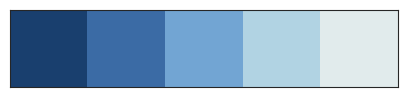

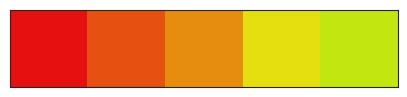

In [60]:
# Libraries
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)




sns.set_style('white')
plt.rcParams['font.family'] = 'monospace'

blues = ['#193f6e','#3b6ba5','#72a5d3','#b1d3e3','#e1ebec']
reds = ['#e61010','#e65010','#e68d10','#e6df10','#c2e610']
cmap_blues = sns.color_palette(blues)
cmap_reds = sns.color_palette(reds)
sns.set_palette(cmap_blues)

print('These are color palette I will use in it:')
sns.palplot(cmap_blues)
sns.palplot(cmap_reds)

In [14]:
# Get data
dados = pd.read_csv('hospital_readmissions.csv')
dados.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [39]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [40]:
dados.isna().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

Aparentemente temos todas as colunas completas, Mas será que estão devidamente preenchidas? Vamos investigar

In [52]:
for i in dados.columns:
    print('columns :', i, 'values: ' , np.sort(dados[i].unique()), '\n')

columns : age values:  ['[40-50)' '[50-60)' '[60-70)' '[70-80)' '[80-90)' '[90-100)'] 

columns : time_in_hospital values:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14] 

columns : n_lab_procedures values:  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 105 106 108 109 111
 113] 

columns : n_procedures values:  [0 1 2 3 4 5 6] 

columns : n_medications values:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 68 69 72 75 79] 

columns : n_outpatient values:  [ 0  1  2  3  4  

Observamos que apenas as colunas medical_specialty, diag_1, diag_2 e diag_3 possue uma valores referentes a Missing e Outros. Apesar disso vamos dar uma olhada na distribuição de todas as variáveis

1- Remoção de dados nulas
2- Tratamento de outliers
3- Análise de correlação
4- encoding de variáveis categóricas
5- Normalização das variáveis
6- Balanceamento na variável alvo
7- Criação do modelo de classificação
8- Avaliação do modelo

In [ ]:
# Lets "save" info and transform categorical into numerical information

# For age
dic = {'[40-50)' : 0 ,
        '[50-60)' : 1,
        '[60-70)' : 2,
        '[70-80)' : 3,
        '[80-90)' : 4,
        '[90-100)': 5,
        'no' : 0 ,
        'normal' : 1,
        'high' : 2,
        'yes': 1}
dados = dados.replace(dic)
      


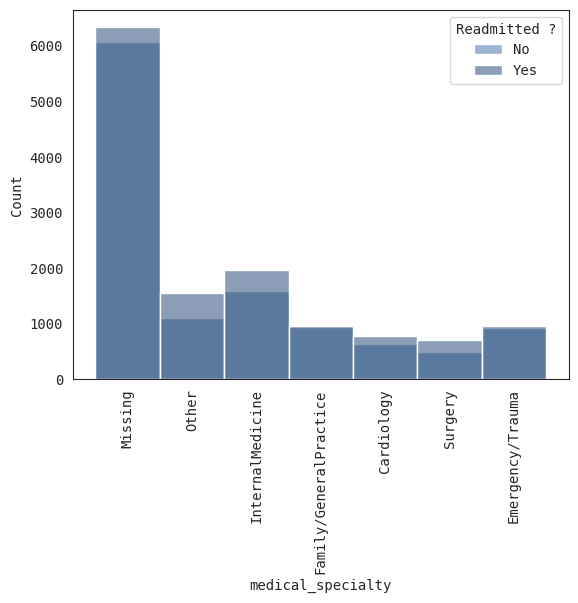

In [104]:
sns.histplot(data = dados, x = 'medical_specialty', hue = 'readmitted')
plt.xticks(rotation=90)
plt.legend(title='Readmitted ?', loc='upper right', labels=['No', 'Yes'])

C:\Users\andre\AppData\Local\Temp\ipykernel_35972\2344270196.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


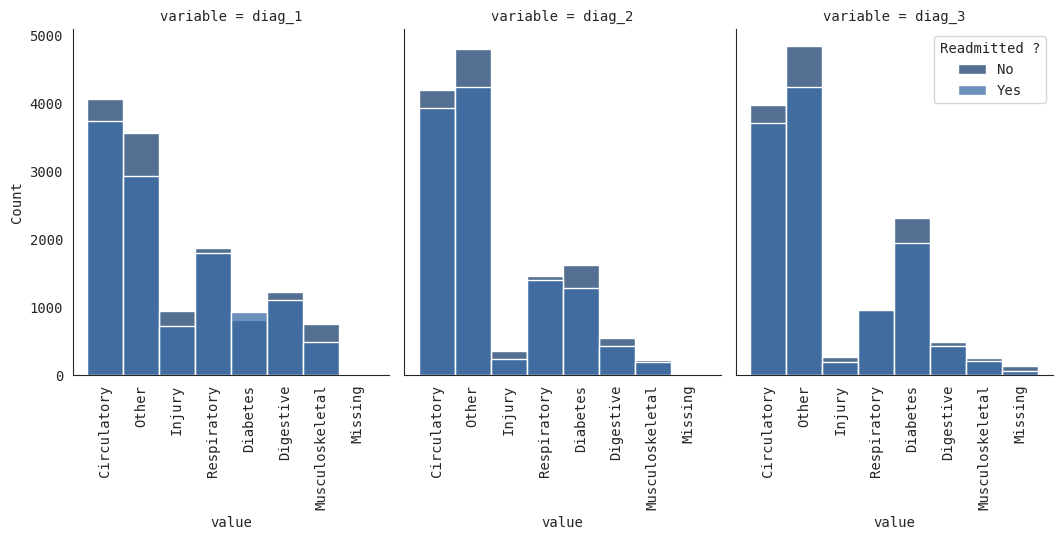

In [105]:

temp = pd.melt(dados, id_vars = ['readmitted'], value_vars = ['diag_1', 'diag_2', 'diag_3'])
g = sns.FacetGrid(temp, col = 'variable',  height = 5.5, aspect = 0.65, hue = 'readmitted')
g.map(sns.histplot, 'value')
plt.legend(title='Readmitted ?', loc='upper right', labels=['No', 'Yes'])
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

In [108]:
temp.groupby(['variable', 'readmitted'])['value'].count()

variable  readmitted
diag_1    0             13246
          1             11754
diag_2    0             13246
          1             11754
diag_3    0             13246
          1             11754
Name: value, dtype: int64

In [112]:
temp.groupby(['value', 'readmitted'])['variable'].count()

value            readmitted
Circulatory      0             12250
                 1             11394
Diabetes         0              4747
                 1              4167
Digestive        0              2252
                 1              1966
Injury           0              1557
                 1              1164
Missing          0               167
                 1                75
Musculoskeletal  0              1236
                 1               897
Other            0             13228
                 1             11433
Respiratory      0              4301
                 1              4166
Name: variable, dtype: int64

C:\Users\andre\AppData\Local\Temp\ipykernel_35972\1419708820.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dados.corr(),


<Axes: >

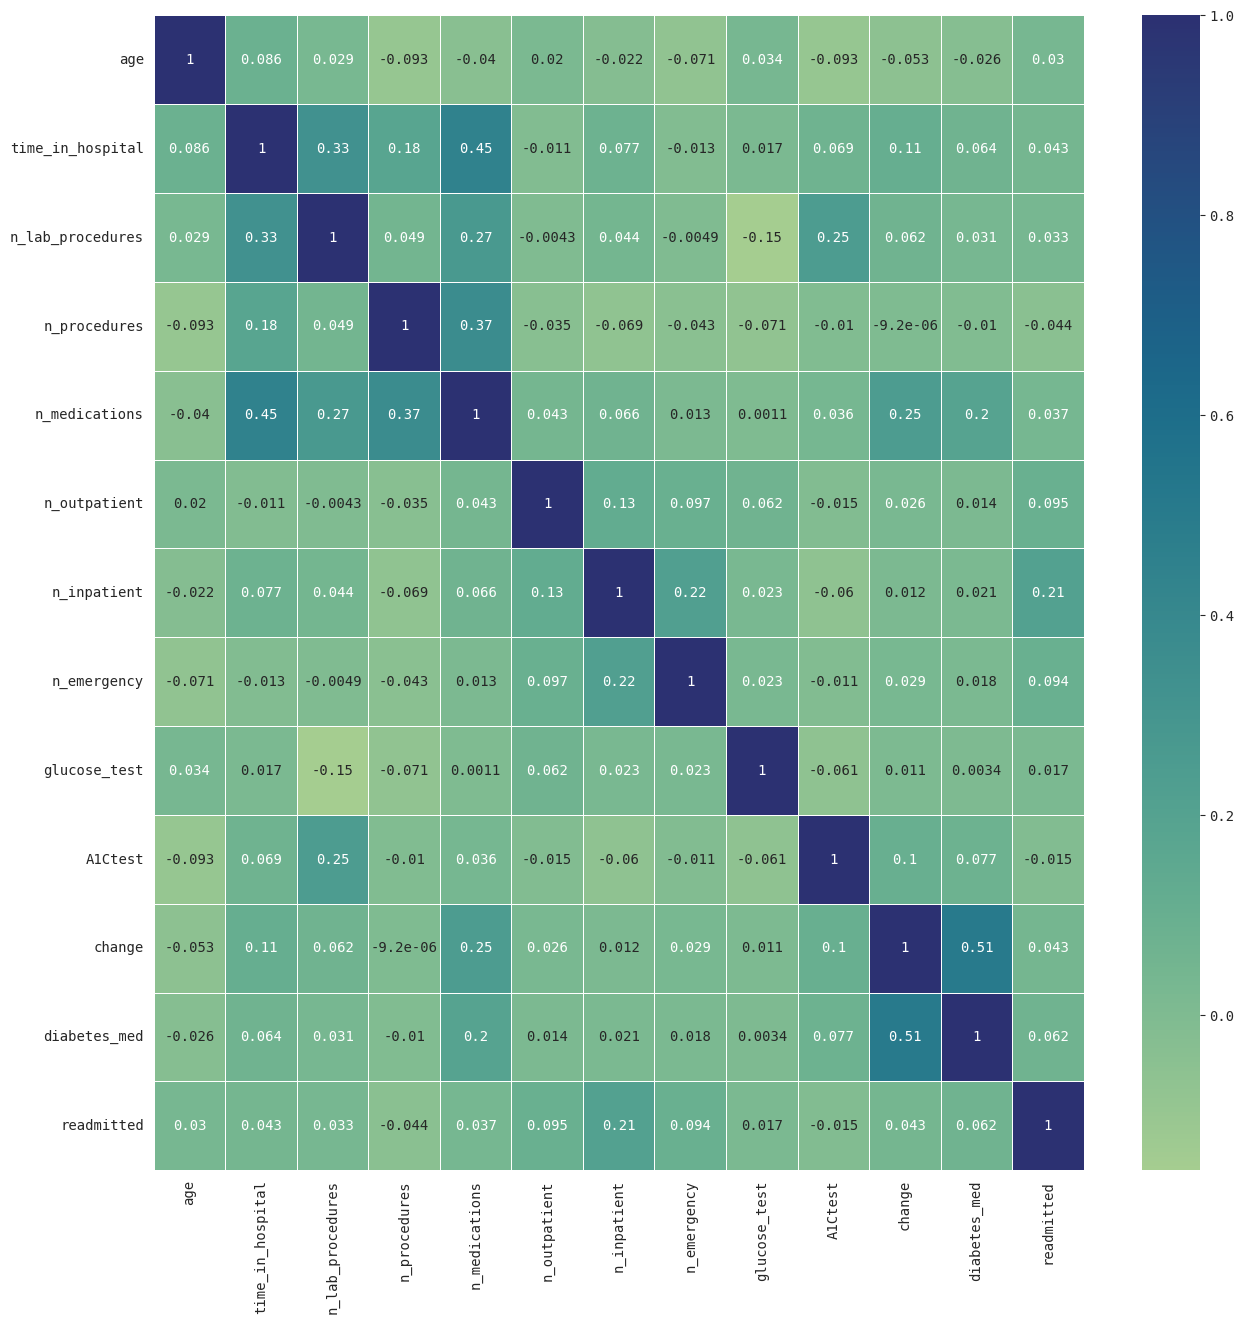

In [78]:
fig, ax = plt.subplots(figsize= (15, 15))
sns.heatmap(dados.corr(),
            annot= True,
            linewidths= 0.5,
            cmap = 'crest',
            )

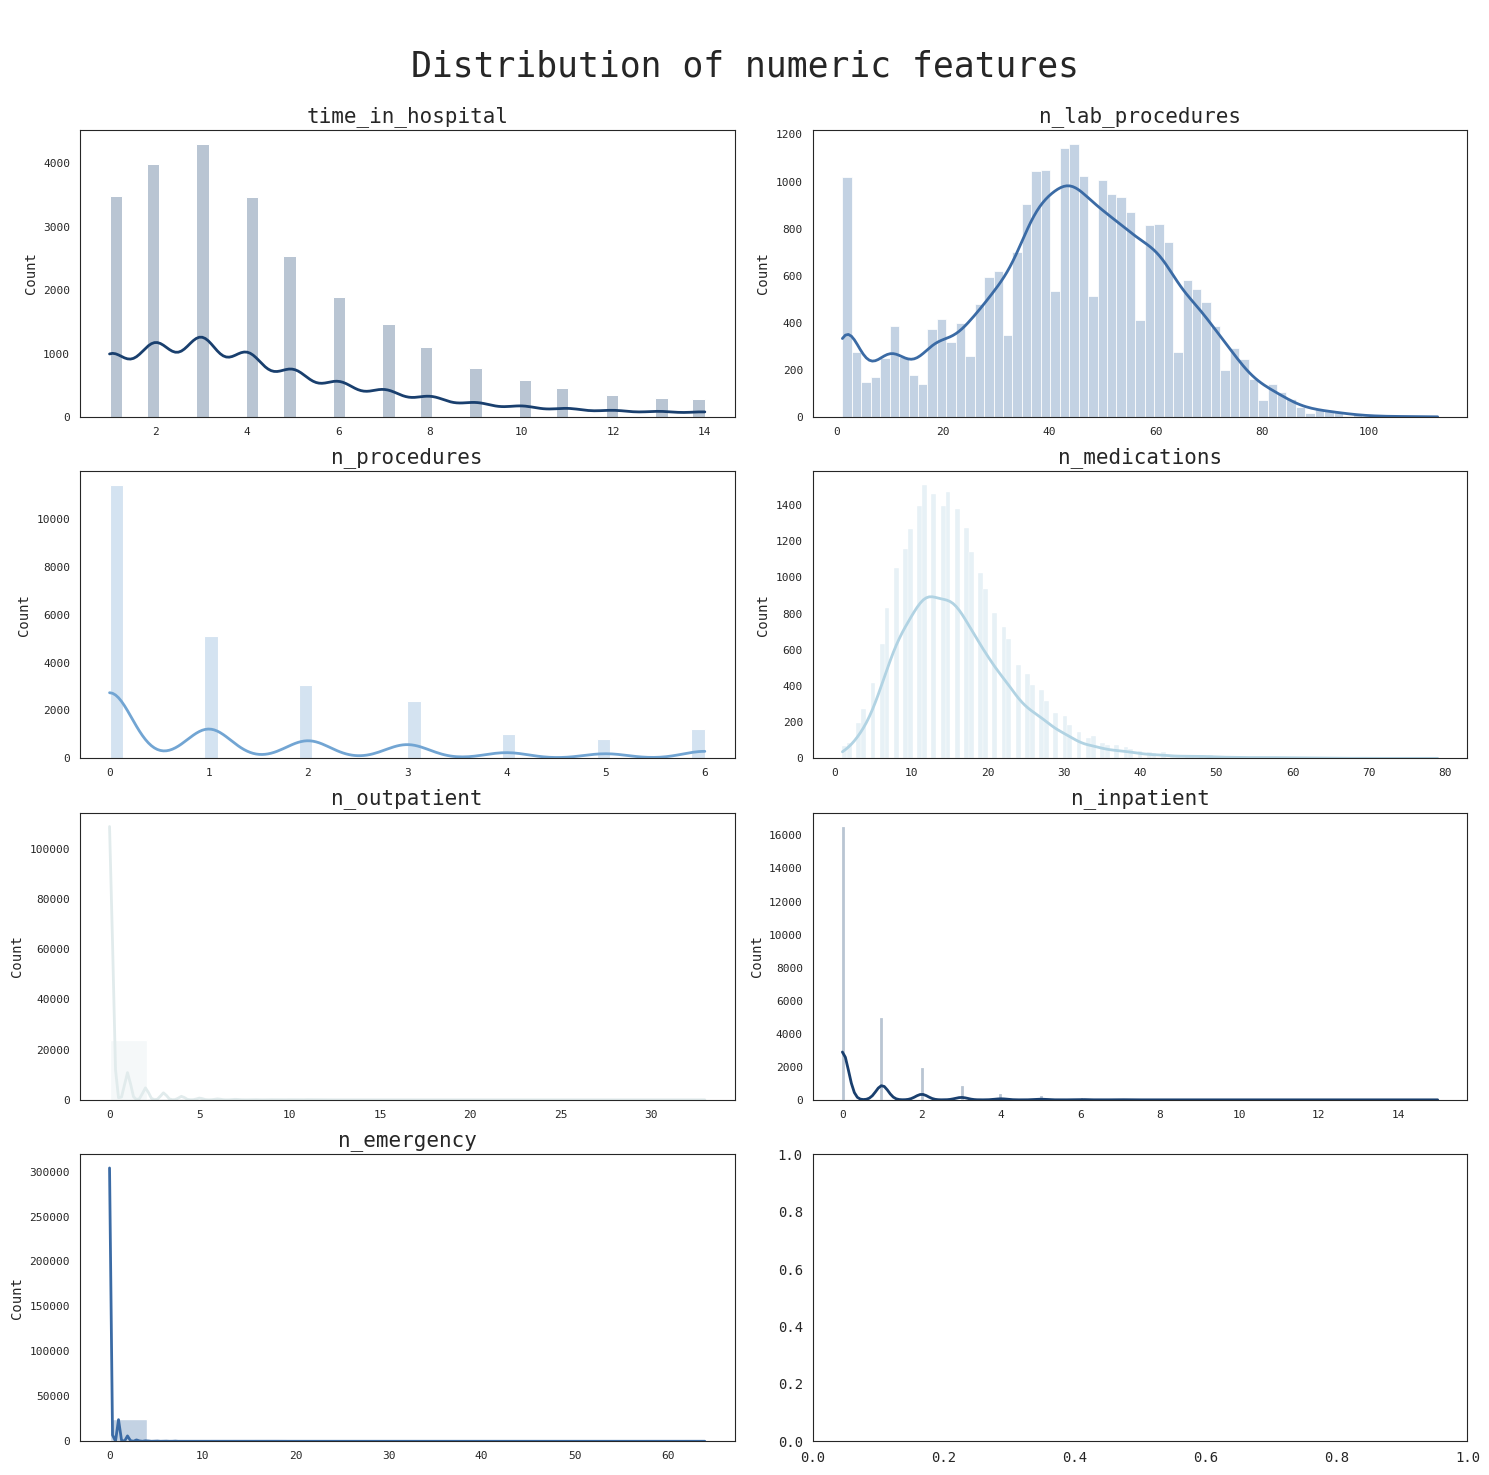

In [62]:
# Variáveis Numéricas

# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
axes = axes.flat
columnas_numeric = dados.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = dados,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 15)
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('\nDistribution of numeric features', fontsize = 25);